In [24]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pylab
from pylab import *
import matplotlib.dates as mdate
from numpy import genfromtxt
import matplotlib.patches as patches

%matplotlib inline

In [25]:
base = 'attempts/2011-2015-6f-new-mem'
#base = '/Users/thilina/csu/research/dsg/source/vldb/neptune-geospatial/benchmarks/query-system/attempts/oct261200'
total_ingested = genfromtxt(base + '/data/cumul-ingested-count.stat', delimiter=',')
total_mem = genfromtxt(base + '/data/cumul-memory-usage.stat', delimiter=',')
cumul_backlog = genfromtxt(base + '/data/cumul-backlog.stat', delimiter=',')
cumul_throughput = genfromtxt(base + '/data/cumul-throughput.stat', delimiter=',')
sketch_count = genfromtxt(base + '/data/sketchlet-count.stat', delimiter=',')

In [26]:
scale_out = []
scale_out_t1 = []
scale_in = []
with open(base + '/data/scale-activity.stat') as f:
    for line in f:
        splits = line.split(',')
        if splits[4].rstrip() == 'scale-out':
            if (splits[1]=='lattice-49:9099' or splits[1]=='lattice-50:9099' or splits[1]=='lattice-52:9099'):
                scale_out_t1.append([float(splits[2]), float(splits[3])])
            else:
                scale_out.append([float(splits[2]), float(splits[3])])
        else:
            scale_in.append([float(splits[2]), float(splits[3])])

552.0


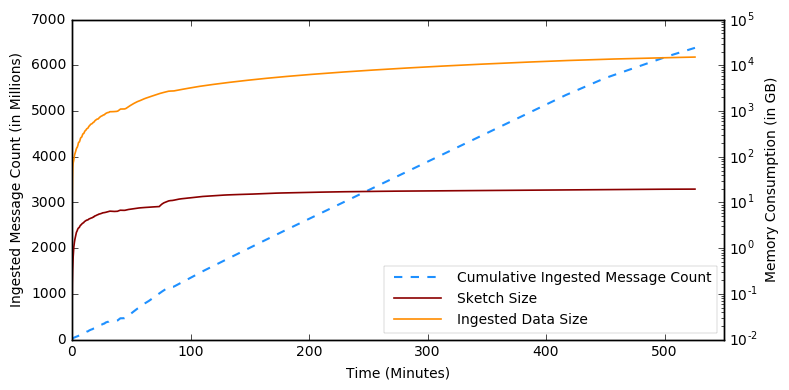

In [42]:
N = 8
leaf_node_size = 8 + (8 * N * 4) + (8 * ((N + 1) * N) / 2)
print(leaf_node_size)

t_end = 7886
t_start_v = total_ingested[0, 0]

fig,ax2 = plt.subplots(figsize=(8,4))
leg_ing = plt.plot((total_ingested[:t_end,0] - t_start_v)/(1000 * 60) , total_ingested[:t_end,1]/1000000, color='dodgerblue', linestyle='--', lw=1.5, label='Cumulative Ingested Message Count')
pylab.ylabel('Ingested Message Count (in Millions)', fontsize=10)
#ax2.tick_params(axis='y', colors='darkblue')
#ax2.yaxis.label.set_color('darkblue')
#ax2.xaxis.set_major_formatter(NullFormatter())
pylab.xlim(0, 550)
pylab.xlabel('Time (Minutes)', fontsize=10)

ax = ax2.twinx()
leg_mem = plt.semilogy((total_mem[:t_end,0] - t_start_v)/(1000 * 60), total_mem[:t_end,1]* leaf_node_size *1024 * 1024/(1024*1024*1024), color='darkred', lw=1.2, label='Sketch Size')
leg_ing_size = plt.semilogy((total_ingested[:t_end,0] - t_start_v)/(1000 * 60), total_ingested[:t_end,1] * 2.5/(1024*1024), color='darkorange', lw=1.2, label='Ingested Data Size')
#ax.tick_params(axis='y', colors='darkorange')
pylab.ylabel('Memory Consumption (in GB)', fontsize=10)
pylab.xlim(0, 550)
#ax.yaxis.label.set_color('darkorange')

lns = leg_ing + leg_mem + leg_ing_size
labs = [l.get_label() for l in lns]
leg = ax2.legend(lns, labs, fontsize=10, ncol=1, loc='lower right', borderaxespad=0.5, handlelength=4)
#leg = ax3.legend(lns, labs, fontsize=9)
leg.get_frame().set_linewidth(0.1)
pylab.tight_layout()
plt.savefig(base +'/figs/ing-and-mem-usage.pdf', dpi=300)

In [28]:
plt.close()

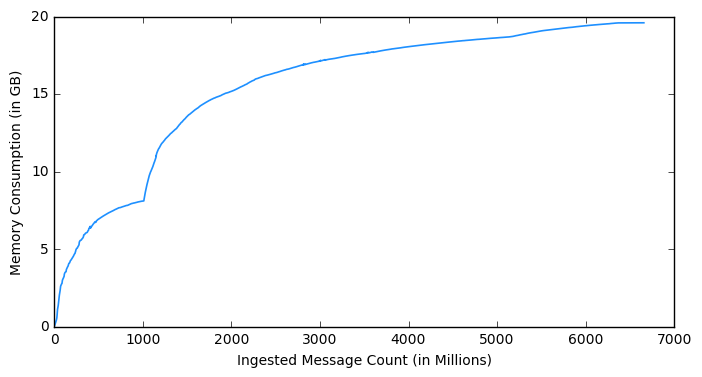

In [29]:
fig = plt.figure(figsize=(8,4))
plt.plot(total_ingested[:,1]/1000000, total_mem[:,1] * leaf_node_size/1024, color='dodgerblue', lw=1.2, label='Ingested Message Count')
pylab.ylabel('Memory Consumption (in GB)', fontsize=10)
pylab.xlabel('Ingested Message Count (in Millions)', fontsize=10)

In [30]:
fig.savefig(base + '/figs/mem-usage-vs-ingested-count.pdf', dpi=300)

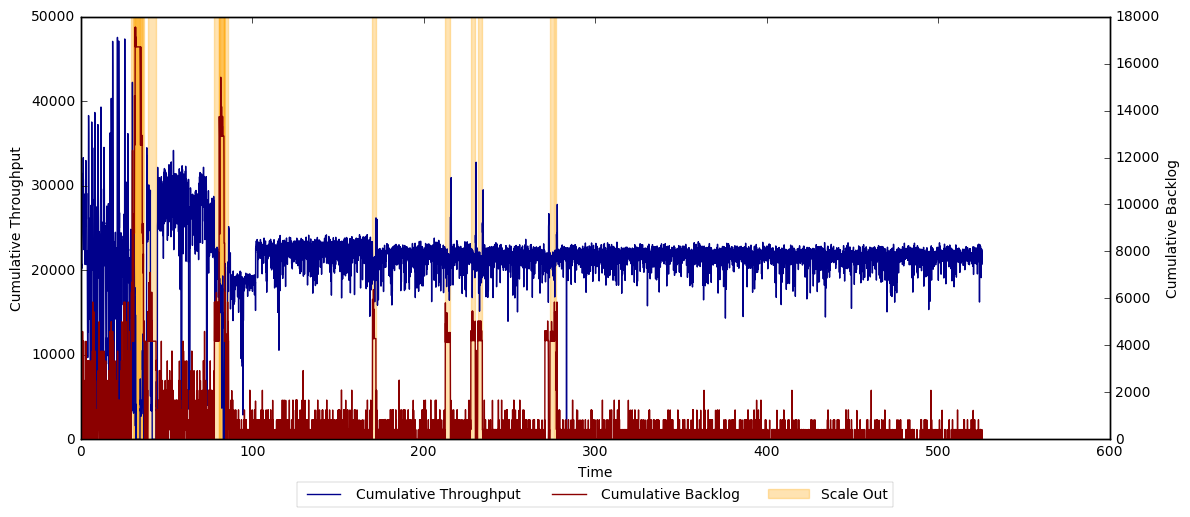

In [50]:
fig2,ax3 = plt.subplots(figsize=(12,5))

leg_throughput = plt.plot((cumul_throughput[:t_end,0] - t_start_v)/(1000 * 60), cumul_throughput[:t_end,1], color='darkblue', label='Cumulative Throughput')
pylab.ylabel('Cumulative Throughput', fontsize=10)
#ax3.xaxis.set_major_formatter(NullFormatter())
pylab.xlabel('Time', fontsize=10)

ax4 = ax3.twinx()
leg_backlog = plt.plot((cumul_backlog[:t_end,0] - t_start_v)/(1000 * 60), cumul_backlog[:t_end,1], color='darkred', label='Cumulative Backlog')
pylab.ylabel('Cumulative Backlog', fontsize=10)

for entry in scale_out_t1:
    #print('x -> ',(entry[0] - t_start_v,0))
    #print('length -> ', (entry[1] - entry[0])/(1000 * 60))
    ax3.add_patch(patches.Rectangle((entry[0] - t_start_v,0), (entry[1] - entry[0])/(1000 * 60), 500000, alpha=0.2, color='orange', label='Scale Out'))

for entry in scale_out:
    leg_scale_out = ax3.add_patch(patches.Rectangle(((entry[0] - t_start_v)/(1000 * 60),0), (entry[1] - entry[0])/(1000 * 60), 500000, alpha=0.3, color='orange', label='Scale Out'))

lns = leg_throughput + leg_backlog
lns = lns + [leg_scale_out]
labs = [l.get_label() for l in lns]
leg = ax3.legend(lns, labs, fontsize=10, ncol=6, bbox_to_anchor=(0.5, -0.16), loc=8, borderaxespad=0., handlelength=3)
#leg = ax3.legend(lns, labs, fontsize=9)
leg.get_frame().set_linewidth(0.1)
pylab.tight_layout()
#for entry in scale_in:
#    ax3.add_patch(patches.Rectangle((entry[0],0), (entry[1] - entry[0]), 30000, alpha=0.4, color='blue', label='Scale Out'))

In [32]:
fig2.savefig(base + '/figs/cumul_throughput.pdf', dpi=300, bbox_extra_artists=(leg,), bbox_inches='tight')


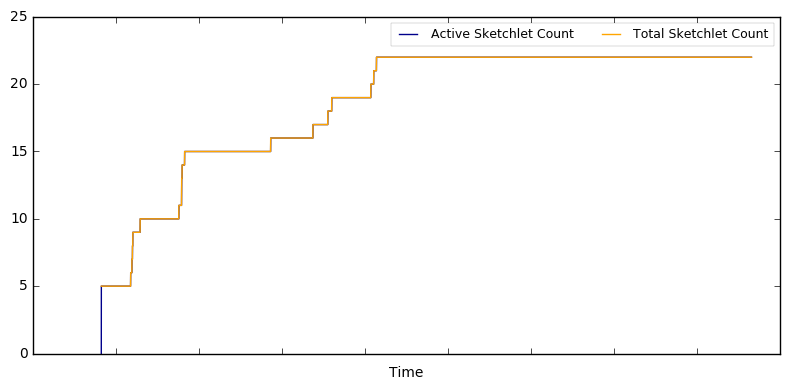

In [33]:

fig3,ax4 = plt.subplots(figsize=(8,4))
active_sketch_count = plt.plot(sketch_count[:,0], sketch_count[:,1], color='darkblue', label='Active Sketchlet Count')
total_sketch_count = plt.plot(sketch_count[:,0], sketch_count[:,2], color='orange', label='Total Sketchlet Count')
ax4.xaxis.set_major_formatter(NullFormatter())
pylab.xlabel('Time', fontsize=10)
lns = active_sketch_count + total_sketch_count
labs = [l.get_label() for l in lns]
leg = ax4.legend(lns, labs, fontsize=9, ncol=2)
leg.get_frame().set_linewidth(0.1)
pylab.tight_layout()

In [34]:
fig3.savefig(base + '/figs/sketch_count.pdf', dpi=300)
plt.close()

In [35]:
ingested = total_ingested[total_ingested.shape[0]-1,1] * 2.5 * 1024/(1024*1024*1024)
sketch_size = total_mem[total_mem.shape[0]-1,1] * leaf_node_size * 1024 * 1024/(1024 * 1024*1024)
print(ingested/sketch_size)

810.008744133
